In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [4]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


# Pre-Processing of the data Ends. 

1. No missing Data.
2. No outliers
3. No encoding required
4. Not a classification problem, so no need to check the imbalance in the dataset. 
5. Data is much within the range...both are nearly equal...so feature scaling is not required. 

In [6]:
# Data Analysis....If the DV and INDEPENDENT VARIABLE ARE LINEARLIY RELATED OR NOT.
# Can be done by two ways...either scatter plot...or if mant features are there...we can also use pairplot. 

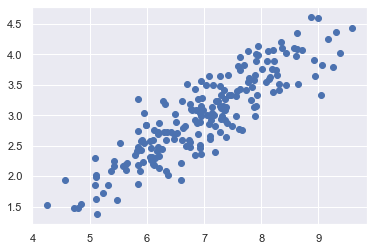

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.show()

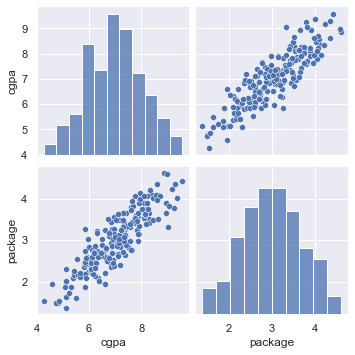

In [8]:
sns.pairplot(df)

# Spliting the data into DV and IDV variables. 

In [9]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [10]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [11]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

# SPliting into training and testing datasets.

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(160, 1) (40, 1) (160,) (40,)


# BUINDING MODEL

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
y_pred_test

array([2.97012606, 2.55516816, 2.61856451, 3.40237388, 3.05657563,
       2.35921582, 3.51763996, 2.4687186 , 4.1227869 , 3.21794814,
       2.12868365, 3.19489493, 2.53787825, 3.05081232, 3.36779405,
       2.86062328, 2.63009112, 2.82028015, 2.37074243, 2.91825632,
       3.1660784 , 2.3361626 , 3.50611335, 3.9902309 , 2.20360661,
       1.90967809, 3.08539215, 2.6070379 , 1.9212047 , 1.90391479,
       2.91249302, 3.69630239, 2.60127459, 2.09410383, 2.50906173,
       3.64443265, 3.17184171, 2.97012606, 3.83462169, 2.50329842])

In [44]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred_test)

0.7297167943957027

In [45]:
r2_score(y_train,y_pred_train)

0.7813227298629095

Both the training and testing model accuracy is above 70%. It is a good model. Now,let us see the slope value:

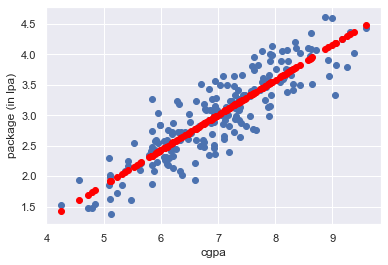

In [46]:
plt.scatter(df['cgpa'],df['package'])
plt.scatter(x_train,lr.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package (in lpa)')
plt.show()

We can see the line which is formed. As we can see this the best fit line...and this will have least sum of square error also. (Min SSE will be there.)

This model works fine. 

Still we will run the regularization models to check if there is any overfitting?

# Regulationzation / Optimization

In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [50]:
ridge= Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
y_pred_r = ridge.predict(x_test)
r2_score(y_test,y_pred_r)

0.7297229294403403

In [51]:
lasso= Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_l = lasso.predict(x_test)
r2_score(y_test,y_pred_l)

0.7312137035888311

In [53]:
en= ElasticNet(alpha=0.01)
en.fit(x_train,y_train)
y_pred_en = en.predict(x_test)
r2_score(y_test,y_pred_en)

0.7309265347198131

We see even after trying to optimize this - using the L1 and L2 regularization, we still get almost similar accuracy level. 
This means there is no overfitting required. And there no need of any further optimization.

# DONE